<h1 align="left">Exploratory Data Analysis on FIFA 19</h1> 

![alt-text-1](https://wallpapercave.com/wp/wp3714377.jpg)

<h2 align="right">By Gyan GM</h2> 

----

<h1> Project & Dataset description | Analysis procedures && Objectives </h1>

<h6> Data is scrapped from official EA sports website provided below. So, the dataset contains full upto date copy of all the players under who are under FIFA ranking</h6>

<b>Source:</b> https://sofifa.com/

It is related to FOOTBALL players <i>(<b>NOT</b> Americal football or soccer).</i> I chose this dataset for the sake of love for this game. I have tried to combine my love for football and data science in order to perform a short exploratory data analysis [EDA] of the FIFA 19 dataset using PYTHON. I have scrapped non-physical player attributes such as Name, Age, Country, Ratings, Club, Value, Wage, Preferred positions etc for this purpose.

My analysis procedure is just a simple exploratory data analysis of dataset scrapped using <i>'BeautifulSoup'</i> python package with the help of other packages like pandas, numpy, matplotlib, seaborn, plotly, cufflinks etc. And the objective is find the details analysis of player ratings, wages, market values across clubs and countries. 

All codes for this project are shared along with this jupyter notebook !

In conclusion, I have enjoyed exploring this dataset. Hope, this one turns out to be insightful for whoever is concerned !!

In [3]:
# Packages

import requests
from bs4 import BeautifulSoup
from pandas import DataFrame, Series
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns



from IPython.core.display import HTML

import warnings
warnings.filterwarnings('ignore')


In [4]:
# Scraping FIFA 19 players data from above source using BeautifulSoup
# Max players?offset as of 23, Sep 2018: 18080

base_url = "https://sofifa.com/players?offset="
searchpg = 0
columns = ['Name', 'Flag', 'Country', 'Club', 'Contract', 'Pos', 'Age', 'Ratings', 'Value', 'Wage']
data = DataFrame(columns=columns)

for searchpg in range(230):
    url = base_url + str(searchpg*85)
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')
    tbody = soup.find('tbody')
#     print(url)
    for row in tbody.findAll('tr'):
        td = row.findAll('td')
        nationality = td[1].find('a').get('title')
        flag_img = td[1].find('img').get('data-src')
        name = td[1].findAll('a')[1].text
        age = td[2].find('div').text.strip()
        overall = td[3].text.strip()
        club = td[5].find('a').text
        value = td[6].text.strip()
        wage = td[7].text.strip()
        pos = td[1].find('span').text
        age = td[2].find('div').text
        contract = td[5].find('div', class_="subtitle text-ellipsis rtl").text.strip()
        dataL = DataFrame([[name, flag_img, nationality, club, contract, pos, age, overall, value, wage]])
        dataL.columns = columns
        data = data.append(dataL, ignore_index=True)
    searchpg+=1
    
'''
data[data.Name == 'L. Messi']
data.Country.unique()
data[data['Country'].str.match('Cz')]
football[football['Name'].str.contains('Ney')]
'''

KeyboardInterrupt: 

# Data Description before cleaning

In [ ]:
# Current working directory
os.getcwd()

In [ ]:
# Exporting scrapped into CSV
data.to_csv('fifa19_players_dataset_src.csv', encoding='utf-8')
#data = pd.read_csv('./fifa19_players_dataset_src.csv')

In [ ]:
# Top 5 rows before data cleaning
data.head(2)

In [ ]:
# Total no of rows and columns in dataset before cleaning and deduplication
data.shape

In [ ]:
# Total no of unique rows in dataset before cleaning and deduplication
data['Name'].nunique()

In [ ]:
data.info()

In [ ]:
data.describe()

---

# Data cleaning & preparation

In [66]:
# Making new copy of original data set for cleaning

football=data.copy()

In [67]:
# UDF to concert string values in columns 'Value' and 'Wage' into float

def str2float(euros):
    # Convert M in value column to millions
    if euros[-1] == 'M':
        return float(euros[1:-1])*1000000
    # Convert K in Wage column to thousands
    elif euros[-1] == 'K':
        return float(euros[1:-1])*1000
    else:
        return float(euros[1:])

# Use lambda function to apply UFD str2float() for each player's market value    
football['Value'] = football['Value'].apply(lambda x: str2float(x))

# Use lambda function to apply UFD str2float() for each player's current wage
football['Wage'] = football['Wage'].apply(lambda x: str2float(x)) 

In [68]:
# Checking if there are any null/missing
football.isnull().sum()

Name        0
Flag        0
Country     0
Club        0
Contract    0
Pos         0
Age         0
Ratings     0
Value       0
Wage        0
dtype: int64

In [69]:
# Nobody can have a value lower than zero
# It can be zero for the FREE TRANSFER players

football.loc[football.Value <= 0].head(2)

,Name,Flag,Country,Club,Contract,Pos,Age,Ratings,Value,Wage
276,L. Paredes,https://cdn.sofifa.org/flags/52.png,Argentina,,Free,CM,24,80,0.0,0.0
328,A. Granqvist,https://cdn.sofifa.org/flags/46.png,Sweden,,Free,CB,33,80,0.0,0.0


In [70]:
# Nobody can have a Wage lower than zero
# It can be zero for the FREE TRANSFER players

football.loc[football.Wage <= 0].head(2)

,Name,Flag,Country,Club,Contract,Pos,Age,Ratings,Value,Wage
276,L. Paredes,https://cdn.sofifa.org/flags/52.png,Argentina,,Free,CM,24,80,0.0,0.0
328,A. Granqvist,https://cdn.sofifa.org/flags/46.png,Sweden,,Free,CB,33,80,0.0,0.0


In [71]:
# Examining duplicate rows
football.loc[football.duplicated(), :].sort_values('Name').head(2)


,Name,Flag,Country,Club,Contract,Pos,Age,Ratings,Value,Wage
10944,A. Griezmann,https://cdn.sofifa.org/flags/18.png,France,Atlético Madrid,2014 ~ 2023,ST,27,89,78000000.0,150000.0
10893,A. Griezmann,https://cdn.sofifa.org/flags/18.png,France,Atlético Madrid,2014 ~ 2023,ST,27,89,78000000.0,150000.0


In [72]:
# Removing duplicates and update the existing dataframe object
football.drop_duplicates(inplace=True)

In [73]:
# Verifying duplicates after deduplication
football[football.duplicated()].sort_values('Name').head(2)

,Name,Flag,Country,Club,Contract,Pos,Age,Ratings,Value,Wage


In [74]:
# Converting Age and Ratings into integers
football['Age'] = football['Age'].astype('int')
football['Ratings'] = football['Ratings'].astype('int')

In [75]:
# mapping countries to their continents - dictionary
continents = {
    'Africa' : ['Algeria','Angola','Benin','Botswana','Burkina','Burundi','Cameroon','Cape Verde','Central African Republic','Chad','Comoros','Congo','DR Congo','Djibouti','Egypt','Equatorial Guinea','Eritrea','Ethiopia','Gabon','Gambia','Ghana','Guinea','Guinea Bissau','Ivory Coast','Kenya','Lesotho','Liberia','Libya','Madagascar','Malawi','Mali','Mauritania','Mauritius','Morocco','Mozambique','Namibia','Niger','Nigeria','Rwanda','Sao Tome and Principe','Senegal','Seychelles','Sierra Leone','Somalia','South Africa','South Sudan','Sudan','Swaziland','Tanzania','Togo','Tunisia','Uganda','Zambia','Zimbabwe','Burkina Faso'],
    'Antarctica' : ['Fiji','Kiribati','Marshall Islands','Micronesia','Nauru','Palau','Papua New Guinea','Samoa','Solomon Islands','Tonga','Tuvalu','Vanuatu'],
    'Asia' : ['Afghanistan','Bahrain','Bangladesh','Bhutan','Brunei','Burma (Myanmar)','Cambodia','China','China PR','East Timor','India','Indonesia','Iran','Iraq','Israel','Japan','Jordan','Kazakhstan','North Korea','South Korea','Korea Republic','Korea DPR','Kuwait','Kyrgyzstan','Laos','Lebanon','Malaysia','Maldives','Mongolia','Nepal','Oman','Pakistan','Palestine','Philippines','Qatar','Russian Federation','Saudi Arabia','Singapore','Sri Lanka','Syria','Tajikistan','Thailand','Turkey','Turkmenistan','United Arab Emirates','Uzbekistan','Vietnam','Yemen','Russia'],
    'Australia Oceania' : ['Australia','New Caledonia', 'New Zealand'],
    'Europe' : ['Albania','Andorra','Armenia','Austria','Azerbaijan','Belarus','Belgium','Bosnia Herzegovina','Bulgaria','Croatia','Cyprus','Czech Republic','Denmark','Estonia','Finland','France','FYR Macedonia','Georgia','Germany','Greece','Hungary','Iceland','Ireland','Italy','Kosovo','Latvia','Liechtenstein','Lithuania','Luxembourg','Macedonia','Malta','Moldova','Monaco','Montenegro','Netherlands','Northern Ireland','Norway','Poland','Portugal','Romania','San Marino','Scotland','Serbia','Slovakia','Slovenia','Spain','Sweden','Switzerland','Ukraine','England','Vatican City','Republic of Ireland','Wales'],
    'North America' : ['Antigua and Barbuda','Bahamas','Barbados','Belize','Canada','Costa Rica','Cuba','Dominica','Dominican Republic','El Salvador','Grenada','Guatemala','Haiti','Honduras','Jamaica','Mexico','Nicaragua','Panama','Saint Kitts and Nevis','Saint Lucia','Saint Vincent and the Grenadines','Trinidad and Tobago','United States'],
    'South America' : ['Argentina','Bolivia','Brazil','Chile','Colombia','Curacao','Ecuador','Guyana','Paraguay','Peru','Suriname','Trinidad & Tobago','Uruguay','Venezuela']
}

In [76]:
# UDF to assign continent to each country
def find_continent(x, continents_list):
    for key in continents_list:
        if x in continents_list[key]:
            return key
    return np.NaN

# Applying UDF find_continent() in order to add new column 'Continents'
football['Continent'] = football['Country'].apply(lambda x: find_continent(x, continents))

In [77]:
# Dictionary for defining grouped player positions
pos_dict = {
    'Attack' : ['ST','RW','LW', 'CF'],
    'Midfield': ['RM', 'CM', 'LM', 'CAM', 'CDM'],
    'Defence': ['CB', 'LB', 'RB', 'RWB', 'LWB'],
    'Goalkeeper': ['GK']}
pos_dict

{'Attack': ['ST', 'RW', 'LW', 'CF'],
 'Midfield': ['RM', 'CM', 'LM', 'CAM', 'CDM'],
 'Defence': ['CB', 'LB', 'RB', 'RWB', 'LWB'],
 'Goalkeeper': ['GK']}

In [78]:
# UDF to assign grouped player positions to original positions which are in abbreviation
def find_position(x, pos_list):
    for key in pos_list:
        if x in pos_list[key]:
            return key
    return np.NaN

# find_position('GK', pos_list=pos_dict)

# Applying UDF find_position() to create full position names in new column 'Position'
football['Position'] = football['Pos'].apply(lambda x: find_continent(x, pos_dict))


In [79]:
# Re-arranging variables in dataset
football = football[['Name', 'Flag', 'Country', 'Continent', 'Club', 'Contract', 'Pos', 'Position', 'Age', 'Ratings',
       'Value', 'Wage']]
football.head(2)

,Name,Flag,Country,Continent,Club,Contract,Pos,Position,Age,Ratings,Value,Wage
0,L. Messi,https://cdn.sofifa.org/flags/52.png,Argentina,South America,FC Barcelona,2004 ~ 2021,CF,Attack,31,94,110500000.0,565000.0
1,Cristiano Ronaldo,https://cdn.sofifa.org/flags/38.png,Portugal,Europe,Juventus,2018 ~ 2022,ST,Attack,33,94,77000000.0,405000.0


In [80]:
# Final Data backup
football.to_csv('fifa19_players_dataset_clean.csv', encoding='utf-8')

In [81]:
## Renaming columns
# football.rename(columns = {'ContractYRS': 'Contract'}, inplace=True)

In [82]:
## Free transfer players
#football.sort_values("Club", na_position='first')
# football[football['Club']== '']
# football[football['Value']== 0.0]
#football[football.Wage == 0.0]

# Data Description after cleaning

In [83]:
football.Name.describe()

count            10865
unique           10482
top       J. Rodríguez
freq                 7
Name: Name, dtype: object

In [84]:
football.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10873
Data columns (total 12 columns):
Name         10865 non-null object
Flag         10865 non-null object
Country      10865 non-null object
Continent    10849 non-null object
Club         10865 non-null object
Contract     10865 non-null object
Pos          10865 non-null object
Position     10865 non-null object
Age          10865 non-null int64
Ratings      10865 non-null int64
Value        10865 non-null float64
Wage         10865 non-null float64
dtypes: float64(2), int64(2), object(8)
memory usage: 1.1+ MB


In [85]:
football.describe()

,Age,Ratings,Value,Wage
count,10865.000000,10865.000000,1.086500e+04,10865.000000
mean,25.188863,66.213162,2.475478e+06,11250.437184
std,4.634133,7.010514,6.071239e+06,25534.711641
min,16.000000,47.000000,0.000000e+00,0.000000
25%,21.000000,62.000000,3.000000e+05,1000.000000
50%,25.000000,66.000000,6.750000e+05,4000.000000
75%,28.000000,71.000000,2.000000e+06,11000.000000
max,45.000000,94.000000,1.185000e+08,565000.000000


In [86]:
football.Ratings.describe()

count    10865.000000
mean        66.213162
std          7.010514
min         47.000000
25%         62.000000
50%         66.000000
75%         71.000000
max         94.000000
Name: Ratings, dtype: float64

In [87]:
football.shape

(10865, 12)

---

# Exploratory Data Analysis begins

In [4]:
football = pd.read_csv('./DataSets/fifa19_players_dataset_clean.csv')

In [4]:
# Top 5 player distribution as per ratings
#football.nlargest(5, columns='Ratings')
#football.sort_values("Ratings", ascending=False).head(5)[["Name", 'Age', "Country", "Ratings"]]
football[["Name", 'Age', "Country", "Ratings"]].nlargest(5, columns='Ratings')

,Name,Age,Country,Ratings
0,L. Messi,31,Argentina,94
1,Cristiano Ronaldo,33,Portugal,94
2,Neymar Jr,26,Brazil,92
3,De Gea,27,Spain,91
4,K. De Bruyne,27,Belgium,91


In [90]:
# Bottom 5 player distribution as per ratings
#football.nsmallest(5, columns='Ratings')
football[["Name", 'Age', "Country", "Ratings"]].nsmallest(5, columns='Ratings')


,Name,Age,Country,Ratings
10863,P. Phillips,19,Republic of Ireland,47
10864,A. Byrne,19,Republic of Ireland,47
10865,K. Fujikawa,19,Japan,47
10866,Ma Junliang,20,China PR,47
10867,K. Olsen,18,England,47


In [91]:
# Top 10 players displayed in HTML with country flags
football['Flag'] = '<img src="' + football['Flag'] + '">'
HTML(football.head(10).to_html(escape=False))

,Name,Flag,Country,Continent,Club,Contract,Pos,Position,Age,Ratings,Value,Wage
0,L. Messi,,Argentina,South America,FC Barcelona,2004 ~ 2021,CF,Attack,31,94,110500000.0,565000.0
1,Cristiano Ronaldo,,Portugal,Europe,Juventus,2018 ~ 2022,ST,Attack,33,94,77000000.0,405000.0
2,Neymar Jr,,Brazil,South America,Paris Saint-Germain,2017 ~ 2022,LW,Attack,26,92,118500000.0,290000.0
3,De Gea,,Spain,Europe,Manchester United,2011 ~ 2019,GK,Goalkeeper,27,91,72000000.0,295000.0
4,K. De Bruyne,,Belgium,Europe,Manchester City,2015 ~ 2023,CAM,Midfield,27,91,102000000.0,395000.0
5,E. Hazard,,Belgium,Europe,Chelsea,2012 ~ 2020,LW,Attack,27,91,93000000.0,380000.0
6,L. Modrić,,Croatia,Europe,Real Madrid CF,2012 ~ 2020,CM,Midfield,32,91,67000000.0,470000.0
7,L. Suárez,,Uruguay,South America,FC Barcelona,2014 ~ 2021,ST,Attack,31,91,80000000.0,510000.0
8,Sergio Ramos,,Spain,Europe,Real Madrid CF,2005 ~ 2020,CB,Defence,32,91,51000000.0,430000.0
9,J. Oblak,,Slovenia,Europe,Atlético Madrid,2014 ~ 2021,GK,Goalkeeper,25,90,68000000.0,94000.0


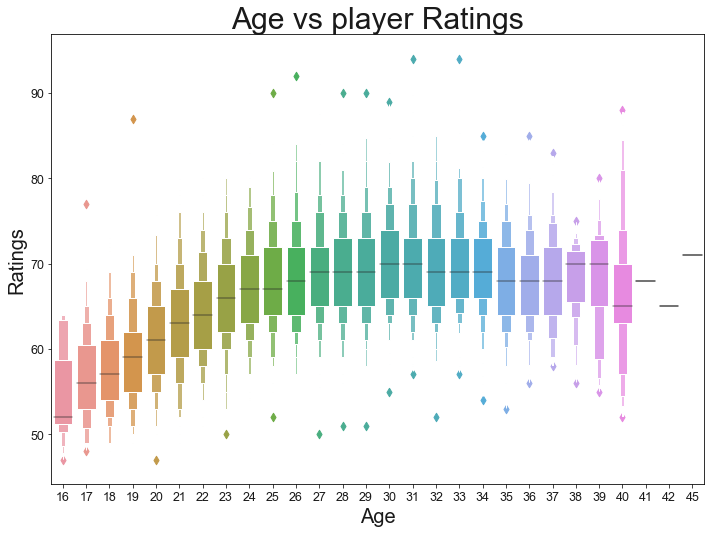

In [5]:
# SNS UDF as template

def sns_settings(title='', xtitle='', ytitle='', rotate = 0):
    sns.set(style='dark', palette='muted', color_codes=True)
    ax.axes.set_title(title, fontsize=30)
    ax.set_xlabel(xtitle, fontsize=20)
    ax.set_ylabel(ytitle, fontsize = 20)
    plt.yticks(fontsize='12.5') # ticks are scaling numbers
    plt.xticks(fontsize='12.5')
    a = plt.setp(ax.get_xticklabels(), rotation=rotate)

canvas = (11.7, 8.27) # A4 size    
fig, ax = plt.subplots(figsize=canvas) # hack to increase the size of figures or plots or canvas

sns_settings(title = 'Age vs player Ratings')
sns.boxenplot(data=football, x="Age", y="Ratings")


---

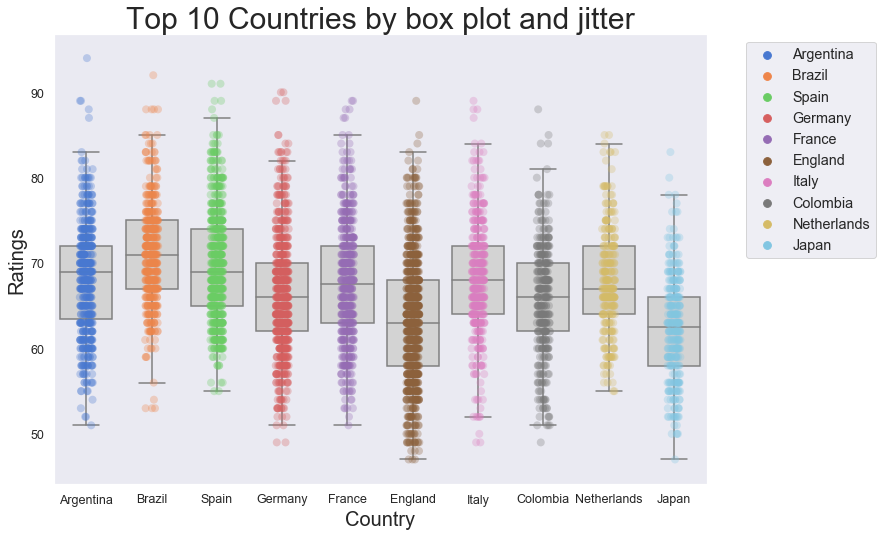

In [6]:
## Data
top10 = list(football['Country'].value_counts().head(10).index)
df_top10 = football.query('Country in @top10')

canvas = (11.7, 8.27) # A4 size    
fig, ax = plt.subplots(figsize=canvas) # hack to increase the size of figures or plots or canvas
sns_settings(title = 'Top 10 Countries by box plot and jitter')

# Box
sns.boxplot(data = df_top10, y = 'Ratings', x = 'Country'
                          , showfliers=False, color='lightgray') # showfliers=False OR , sym='' : remove outliers
# Jitter
sns.stripplot(data=df_top10, x='Country', y = 'Ratings', jitter = True, hue ='Country', size=8, linewidth=0,  alpha=0.3)
ax.legend(bbox_to_anchor=(1.05, 1), loc = 2, fontsize='large')


----

In [7]:
df_top10['Country'].iplot(kind='hist', bins=55, colors='blue', 
                          title = "Top ten  Countries with highest number of players"
                          , xTitle = 'Countries', yTitle = 'No of players', theme = 'solar')


---

In [8]:
football.iplot(kind = 'pie', labels='Continent', values='Ratings', title=' Continentwise Ratings')

In [143]:
''' Explaination: NULL under countries in above pi-chart are the countries which are not in continents dictionary as
no details on it was sought

Some of such countries include:

- Central African Rep.
- Guam
- Antigua & Barbuda
- Montserrat
- St Lucia
- Faroe Islands
- Bermuda
- St Kitts Nevis
'''

---

In [9]:
df_t10c = football[["Name", "Wage", "Club"]]
topclubs = df_t10c.groupby("Club", as_index= False).median().sort_values("Wage", ascending = False).head(10)
topclubs = list(topclubs["Club"])

df_t10c.groupby("Club", as_index= False).median().sort_values("Wage", ascending = False).head(10)

,Club,Wage
473,Real Madrid CF,185000.0
218,FC Barcelona,157500.0
380,Manchester United,130000.0
330,Juventus,115000.0
368,Liverpool,105000.0
379,Manchester City,100000.0
585,Tottenham Hotspur,95500.0
140,Chelsea,94500.0
52,Arsenal,91000.0
209,Everton,84500.0


---

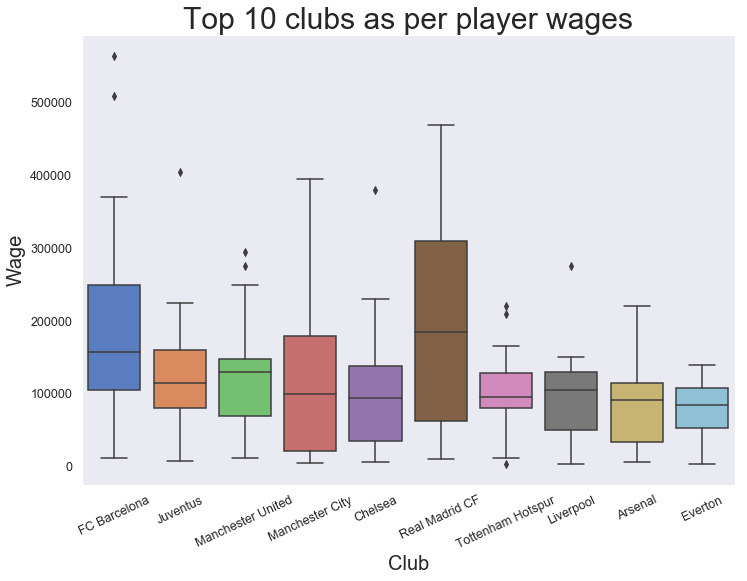

In [10]:
c = football.query('Club in @topclubs')

canvas = (11.7, 8.27) # A4 size    
fig, ax = plt.subplots(figsize=canvas) # hack to increase the size of figures or plots or canvas
sns_settings(title = "Top 10 clubs as per player wages", rotate = 25)

sns.boxplot(data = c, y = 'Wage', x = 'Club')


---

In [11]:
# Violin Plot for Wage over Age

dfo18=football[football.Age>=18]
df_t1k = dfo18[dfo18.Age<=36][:1000]

# Grouping the data by Age as index and displaying Value and Wage as per age groups  
age_wage_value = df_t1k.groupby(['Age']).agg({'Wage': 'mean'})      

data_plot4 = []
for i in range(0,len(pd.unique(df_t1k['Age']))):
    trace = {
            "type": 'violin',
            "x": df_t1k['Age'][df_t1k['Age'] == pd.unique(df_t1k['Age'])[i]],
            "y": df_t1k['Wage'][df_t1k['Age'] == pd.unique(df_t1k['Age'])[i]],
            "name": pd.unique(df_t1k['Age'])[i],
            "showlegend":False,
            "showextrema" : False,
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
        "marker" : {
          "color" : "rgb(0,102,102)"
        }
        }
    data_plot4.append(trace)

        
fig4 = {
    "data": data_plot4,
    "layout" : {
        "title": "Distribution of Player Wage over Age",
        "yaxis": {
            "zeroline": False,
            "showlegend":False,
        "title":"Wage in Euros (Thousands)" 
        },
        "xaxis": {
                "title":"Player Age between 18 & 36"
                }
    }
    }


# py.plot(fig4, filename='Wage_Age_Violin.html', validate = False)
iplot(fig4, validate = False)

---

In [12]:
Att = football[football['Position'] == 'Attack'].sort_values('Ratings', ascending=False)[:100]
Mid = football[football['Position'] == 'Midfield'].sort_values('Ratings', ascending=False)[:100]
Def = football[football['Position'] == 'Defence'].sort_values('Ratings', ascending=False)[:100]
Gk = football[football['Position'] == 'Goalkeeper'].sort_values('Ratings', ascending=False)[:100]

In [13]:
trace1 = go.Box(
    y = Att["Value"],
    name = "Attack",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(0,204,102)'),
    line = dict(
        color = 'rgb(0,204,102)')
)

trace2 = go.Box(
    y = Mid["Value"],
    name = "Midfielder",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(0,204,204)'),
    line = dict(
        color = 'rgb(0,204,204)')
)  

trace3 = go.Box(
    y = Def["Value"],
    name = "Defence",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(0,153,153)'),
    line = dict(
        color = 'rgb(0,153,153)')
)
trace4 = go.Box(
    y = Gk["Value"],
    name = "Goalkeeper",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(102,0,102)'),
    line = dict(
        color = 'rgb(102,0,102)')
)

data_plot = [trace1,trace2,trace3,trace4]

layout = go.Layout(
    title = "Value of players at different playing positions"
)

fig5 = go.Figure(data=data_plot,layout=layout)
#py.plot(fig, filename = "Value over Position.html")
iplot(fig5)

In [14]:
# Most valuable players (using sort function and then pulling heads)
MostPaid = football.sort_values('Value',ascending=False)[['Name','Value','Wage','Ratings']].head(10)

#trace 1 for primary y axis
trace1 = go.Bar(
    x=MostPaid['Name'],
    y=MostPaid['Ratings'],
    name='Ratings',
    yaxis = 'y1',
    marker = dict(
            color= 'rgb(35,71,213)'
            )
    )

#trace 2 for primary y axis
trace2 = go.Bar(
    x=MostPaid['Name'],
    y=MostPaid['Ratings'],
    name='Overall Score',
    yaxis = 'y1',
    marker = dict(
            color= 'rgb(43,84,187)'
            )
    )

#trace 3 for secondary y axis
trace3 = go.Scatter(
    x=MostPaid['Name'],
    y=MostPaid['Wage'],
    name= 'Wage (in €)',
    yaxis = 'y2',
    mode = 'lines+markers',
    line = dict(
            color = 'rgb(0,12,254)',
            width = 2.5)
    )

#trace 3 for different scale secondary y axis  
trace4 = go.Scatter(
    x=MostPaid['Name'],
    y=MostPaid['Value'],
    name= 'Value (in €)',
    yaxis = 'y3',
    mode = 'lines+markers',
    line = dict(
            color = 'rgb(31,12,200)',
            width = 2.5)
    )


# Final dataset combinig all traces
datatrace = [trace1,trace2,trace3,trace4]

# layout of plot
layout = go.Layout(
    barmode='overlay',
    title='Top 10 most valuable players NOW !',
    width=1200,
    xaxis=dict(
            domain = [0,0.7],
             tickangle=30
    ),
    yaxis2=dict(
        title='Wage',
        anchor='free',
        overlaying='y',
        side='right',
        position=0.75
    ),
    yaxis3=dict(
        title='Value',
        anchor='x',
        overlaying='y',
        side='right'
    )
)
      
fig6 = go.Figure(data=datatrace, layout=layout)

#plotting into a multi axis chart
# py.plot(fig, filename='Player Worth') 
iplot(fig6)

---

In [15]:
chore = football.groupby(['Country']).agg({'Name': 'count'}).reset_index()
# football[football.Country=='Afghanistan']

data = dict(type = 'choropleth',
            locations=chore['Country'],
            locationmode='country names',
            z= chore.Name,
            text= chore['Country'],
            colorbar={'title': 'No of Players'})

layout=dict(title='Contry wise player distribution',
            geo = dict(showframe=False, projection={'type':'orthographic'}))

choromap = go.Figure(data=[data], layout=layout)

iplot(choromap, validate=False)


---